In [2]:
import pandas as pd
results = pd.read_csv("BPP1_Experiment_Results.csv")
print(results.head())

   Experiment_Set  Run_Number  Iteration    p    e  Best_Fitness  \
0               1           0          0  100  0.9        2542.0   
1               1           0        500  100  0.9        2330.0   
2               1           0       1000  100  0.9        2599.0   
3               1           0       1500  100  0.9        2402.0   
4               1           0       2000  100  0.9        3844.0   

   Average_Fitness  
0          6487.32  
1          5941.48  
2          6075.99  
3          6005.63  
4          6213.70  


In [3]:
grouped = results.groupby(['Experiment_Set'])
grouped.head()

,Experiment_Set,Run_Number,Iteration,p,e,Best_Fitness,Average_Fitness
0,1,0,0,100,0.9,2542.0,6487.32
1,1,0,500,100,0.9,2330.0,5941.48
2,1,0,1000,100,0.9,2599.0,6075.99
3,1,0,1500,100,0.9,2402.0,6005.63
4,1,0,2000,100,0.9,3844.0,6213.70
105,2,0,0,100,0.6,2542.0,6487.32
106,2,0,500,100,0.6,3193.0,5898.82
107,2,0,1000,100,0.6,1749.0,6154.99
108,2,0,1500,100,0.6,2389.0,5931.14
109,2,0,2000,100,0.6,2676.0,6045.57


In [4]:
experiment_datasets = {}
for name, group in grouped:
    experiment_datasets[name] = group.reset_index(drop=True)

In [5]:
print("Dataset for (Experiment_Set=1, Run=0):")
print(experiment_datasets[1,])

Dataset for (Experiment_Set=1, Run=0):
     Experiment_Set  Run_Number  Iteration    p    e  Best_Fitness  \
0                 1           0          0  100  0.9        2542.0   
1                 1           0        500  100  0.9        2330.0   
2                 1           0       1000  100  0.9        2599.0   
3                 1           0       1500  100  0.9        2402.0   
4                 1           0       2000  100  0.9        3844.0   
..              ...         ...        ...  ...  ...           ...   
100               1           4       8000  100  0.9        3110.0   
101               1           4       8500  100  0.9        2929.0   
102               1           4       9000  100  0.9        2503.0   
103               1           4       9500  100  0.9        3130.0   
104               1           4      10000  100  0.9        2831.0   

     Average_Fitness  
0            6487.32  
1            5941.48  
2            6075.99  
3            6005.63  
4    

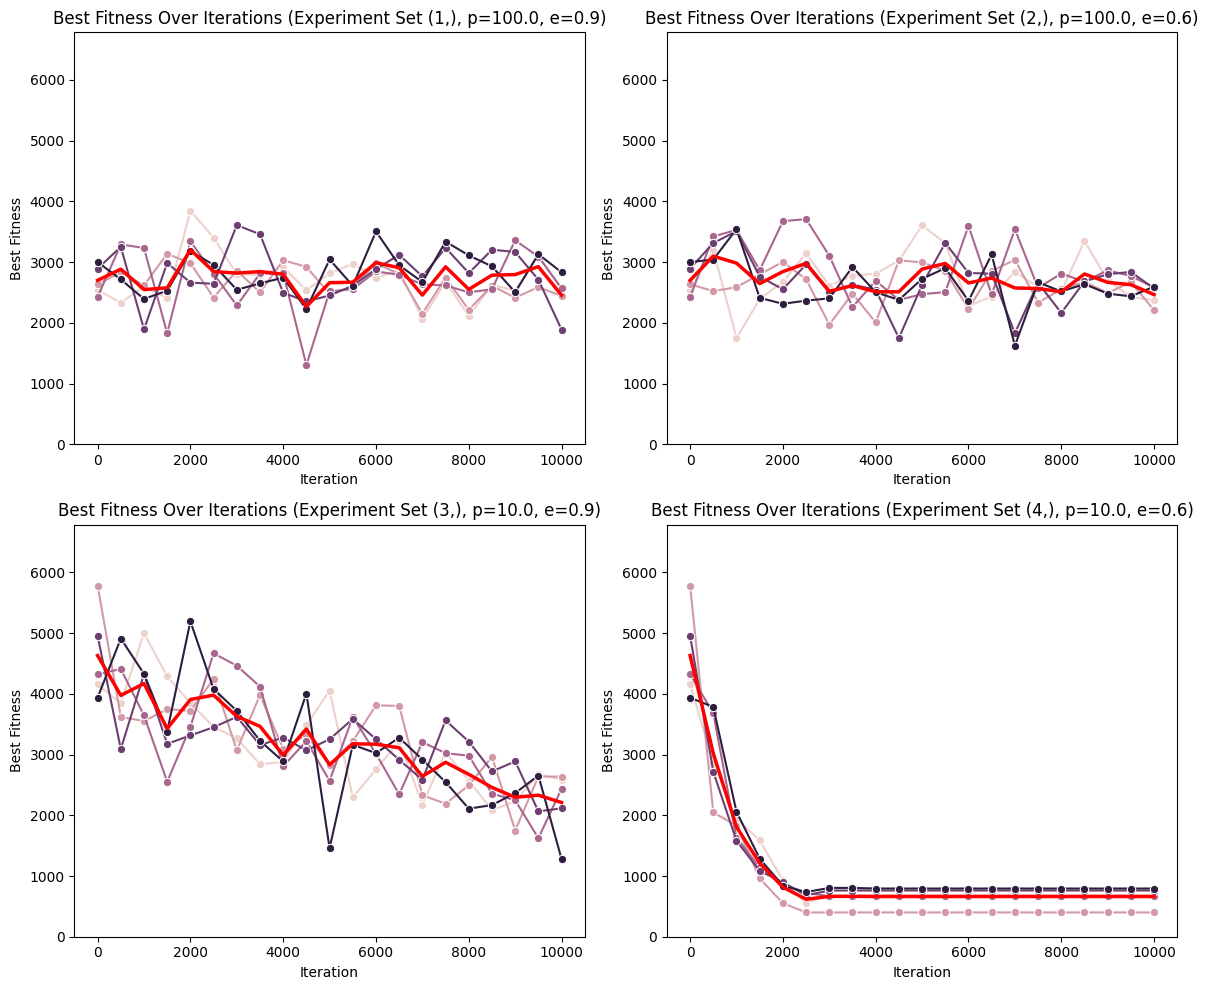

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Determine the global min and max of 'Best_Fitness' across all experiment sets
all_fitness_values = []
for exp_key in experiment_datasets.keys():
    all_fitness_values.append(experiment_datasets[exp_key]['Best_Fitness'])
global_min = min([min(values) for values in all_fitness_values])
global_max = max([max(values) for values in all_fitness_values])

# Plot for each experiment set
for i, exp_key in enumerate(experiment_datasets.keys()):
    dataset = experiment_datasets[exp_key]
    
    # Plot individual runs
    sns.lineplot(data=dataset, x='Iteration', y='Best_Fitness', hue='Run_Number', marker="o", ax=axs[i], legend=False)
    
    # Calculate and plot the average line
    average_fitness = dataset.groupby('Iteration')['Best_Fitness'].mean()
    axs[i].plot(average_fitness.index, average_fitness.values, color='red', linewidth=2.5, label='Average')

    # Set consistent y-axis limits
    axs[i].set_ylim(0, global_max+1000)
    
    # Title and labels
    axs[i].set_title(f'Best Fitness Over Iterations (Experiment Set {exp_key}, p={dataset.iloc[0]["p"]}, e={dataset.iloc[0]["e"]})')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel('Best Fitness')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
